In [1]:
#The Process taken to train the model is as follows:
#1. Load the data
#2. Preprocess the data
#3. Create the model
#4. Train the model
#5. Evaluate the model
#6. Save the model
#7. Make predictions
#8. Save the predictions
#9. Load the model
#10. Load the predictions
#11. Evaluate the model on the predictions
#12. Make predictions on new data
#13. Save the new predictions
#14. Load the new predictions
#15. Evaluate the model on the new predictions 


In [2]:
#Importation of Required Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



In [3]:
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
1,M,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
2,B,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
3,B,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
4,M,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
5,B,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


In [4]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5015, 31)

In [5]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 1 to 5015
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5015 non-null   object 
 1   radius_mean              5015 non-null   float64
 2   texture_mean             5015 non-null   float64
 3   perimeter_mean           5015 non-null   float64
 4   area_mean                5015 non-null   float64
 5   smoothness_mean          5015 non-null   float64
 6   compactness_mean         5015 non-null   float64
 7   concavity_mean           5015 non-null   float64
 8   concave points_mean      5015 non-null   float64
 9   symmetry_mean            5015 non-null   float64
 10  fractal_dimension_mean   5015 non-null   float64
 11  radius_se                5015 non-null   float64
 12  texture_se               5015 non-null   float64
 13  perimeter_se             5015 non-null   float64
 14  area_se                  5015

In [6]:
#Checking for Missing Values in the Dataset using Columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Checking for Missing Values in all the Dataset
df.isnull().sum().sum()

#We have no missing values in the Dataset

0

In [8]:
#Counting the numbers of Benign and Malignant Diagnosis
#Benign Means the Tumor is not Cancerous
#Malignant Means the Tumor is Cancerous
df['diagnosis'].value_counts()

diagnosis
M    3149
B    1866
Name: count, dtype: int64

<Axes: ylabel='count'>

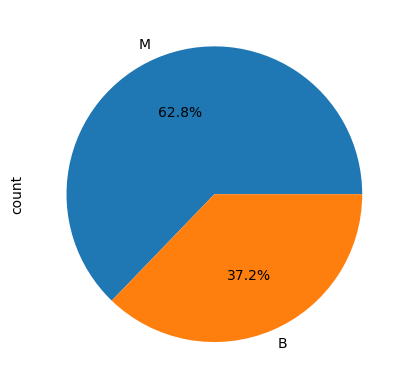

In [9]:
#Putting the Diagnosis in a Pie Chart
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#This show that the Diagnosis has more Cancerous Tumor than Non-Cancerous Tumor

C:\Users\iamse\AppData\Local\Temp\ipykernel_18740\1314231660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, label='count', palette=['#1f77b4', '#ff7f0e'])


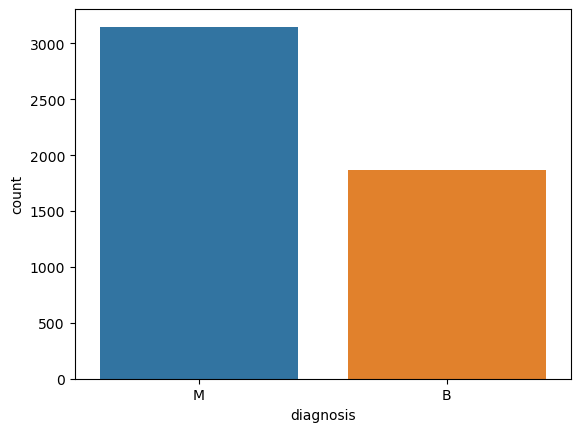

In [10]:
#Showing Data Distribution of the Diagnosis
#import warnings
#warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='diagnosis', data=df, label='count', palette=['#1f77b4', '#ff7f0e'])
plt.show()

In [12]:
#Label Encoding the Diagnosis Column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Transformation of Categorical Data into Numberical Data

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df.head()
	


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
1,1,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
2,0,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
3,0,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
4,1,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
5,0,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


In [15]:
# The Diagnosis Column has been Transformed into Numerical Data with 0 and 1
# 0 Means the Tumor is not Cancerous
# 1 Means the Tumor is Cancerous
df['diagnosis'] .values

array([1, 0, 0, ..., 0, 1, 1])

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
# There are 3 sets of Mean Columns in the Dataset which are the Mean Columns, Standard Error Columns and Worst Columns
# We will be using the Mean Columns for the Prediction but Pairplot will be used to show the relationship between the Mean Columns, Standard Error Columns and Worst Columns with the Diagnosis Column
# and the Diagnosis Column

#Getting Mean Colon Lump with Diagnosis
themean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Standard deviation Lump Columns with diagnosis
thestandarddev_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst Case Lump column with diagnosis
theworst_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



In [ ]:
#Next We show the corellation between the Mean Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Mean Columns and the Diagnosis Column

sns.pairplot(df[themean_col],hue = 'diagnosis', palette = 'coolwarm')
plt.show()

In [ ]:
#Next We show the corellation between the Standard Deviation Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Standard Deviation Columns and the Diagnosis Column
sns.pairplot(df[thestandarddev_col],hue = 'diagnosis', palette='YlGnBu')
plt.show()

In [ ]:
# pairplot for worst columns
#Next We show the corellation between the Worst Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Worst Columns and the Diagnosis Column
sns.pairplot(df[theworst_col],hue = 'diagnosis', palette='Oranges')
plt.show()

In [ ]:
#Pair Plot of the Dataset According to the Diagnosis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

In [ ]:
#Correlation Matrix of the first 11 Columns
#df.corr()
df.iloc[:, 0:11].corr()

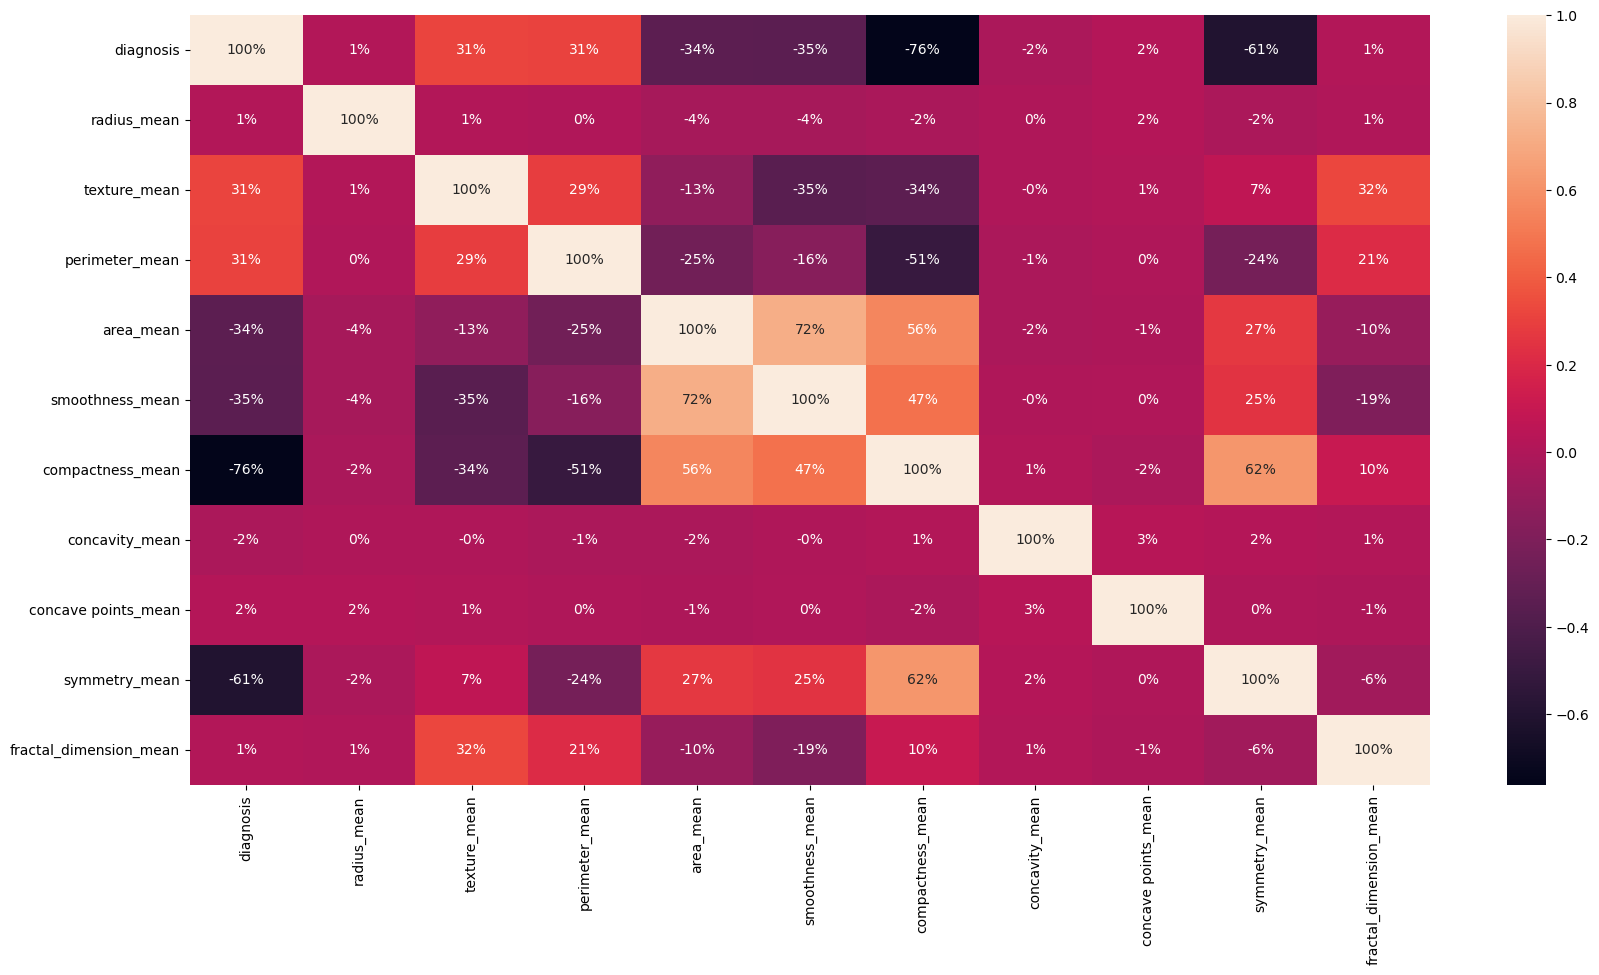

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[themean_col].corr(), annot=True, fmt='.0%') #fmt='.0%' to show the percentage
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

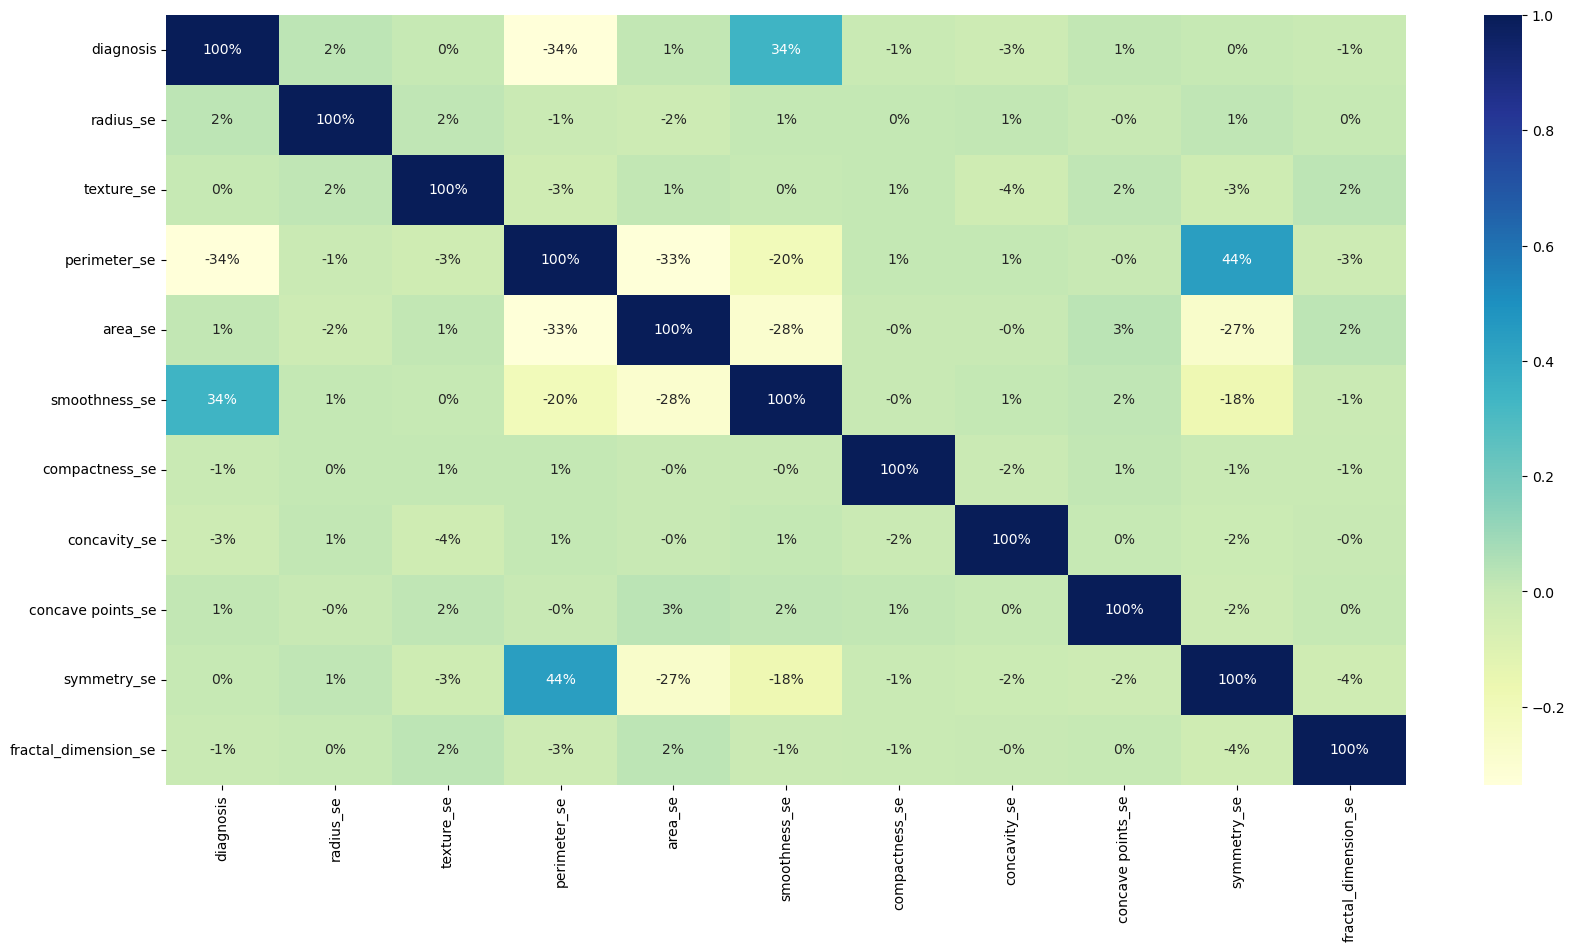

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[thestandarddev_col].corr(), annot=True, fmt='.0%', cmap='YlGnBu') #fmt='.0%' to show the percentage
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

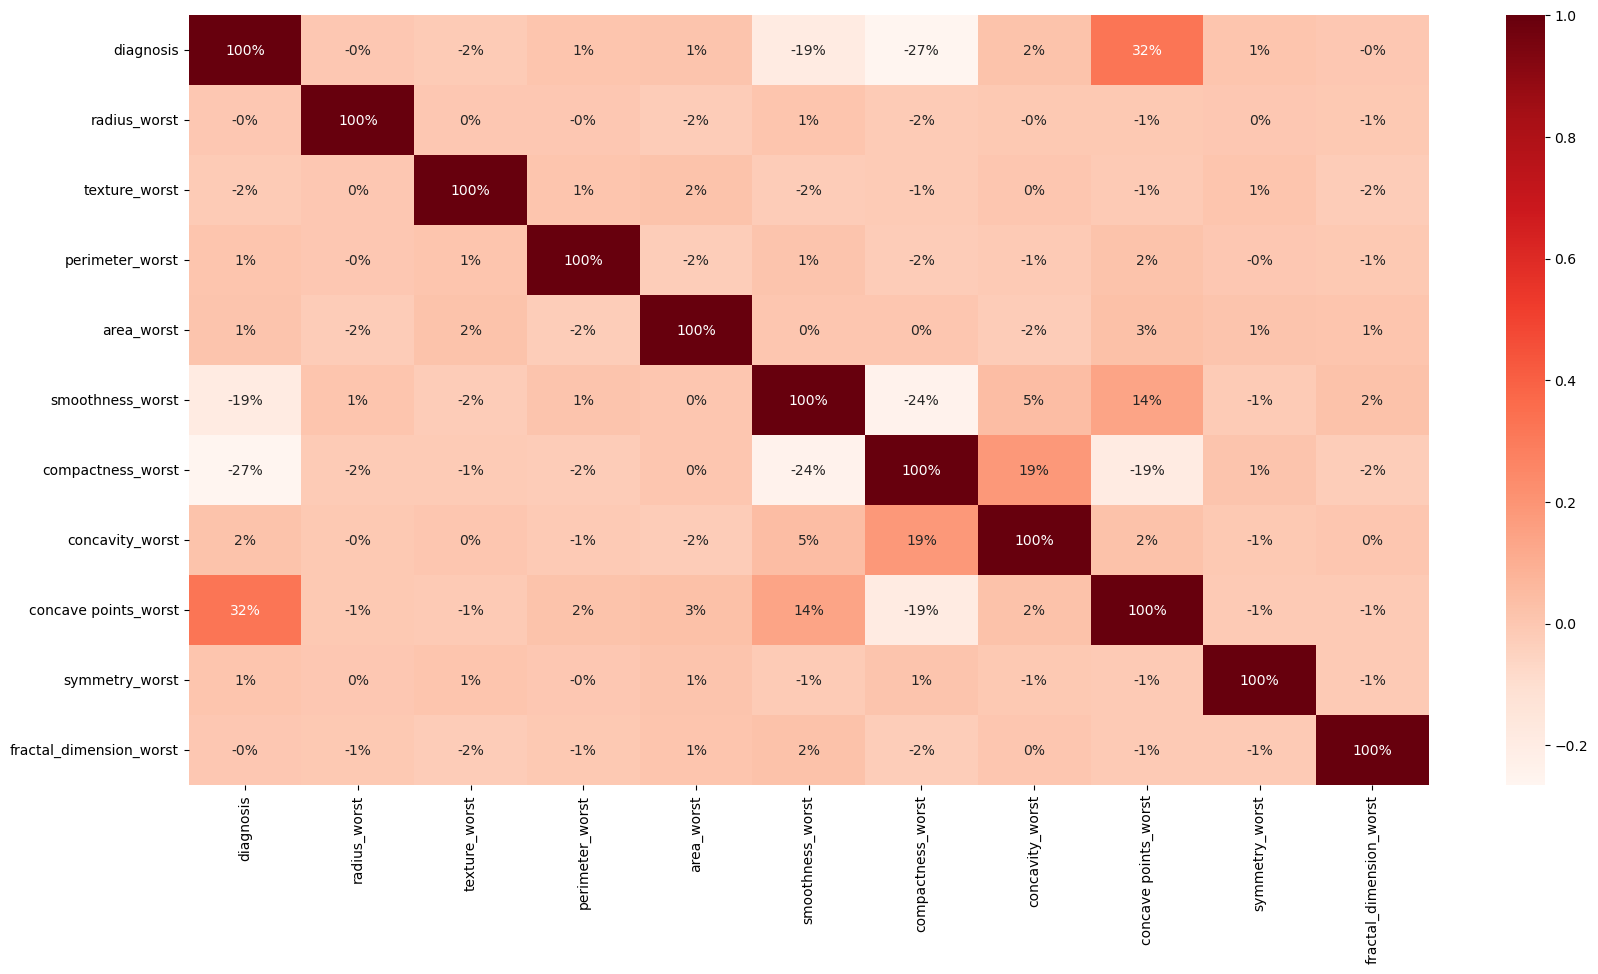

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[theworst_col].corr(), annot=True, fmt='.0%', cmap='Reds') #fmt='.0%' to show the percentage
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

In [44]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# The Training Set is 80% of the Dataset while the Test Set is 20% of the Dataset
# The Random State is set to 42

X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=22)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (4012, 30)
Shape of test set: (1003, 30)


In [ ]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=['#1f77b4', '#ff7f0e'])
plt.title('Train Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette=['#1f77b4', '#ff7f0e'])
plt.title('Test Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()